# GEOG5990M Final Assignment (Template)

Student ID number:

In [8]:
# read in required packages
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from shapely.geometry import Polygon


# *Data Pre-Processing*

In [10]:
# Load the IMD data using the correct file path
imd_df = pd.read_csv('/content/imd_2019.csv.csv')
obesity_df = pd.read_csv('/content/obesity_ltla.csv.csv')

# Load the LSOA boundaries (adjust path if needed)
lsoa = gpd.read_file('/content/LSOA21_LEP22_EN_LU_V2_1257217511592315640.csv')
lsoa = gpd.read_file('/content/Local_Authority_Districts_May_2023_UK_BFE_V2_6070521200333419231.csv')
lsoa = gpd.read_file('/content/Leeds (1).geojson')

import os
import geopandas as gpd

try:
    # Try utf-8 encoding first
    lsoa_df = pd.read_csv('LSOA21_LEP22_EN_LU_V2_1257217511592315640.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        # Try latin-1 encoding if utf-8 fails
        lsoa_df = pd.read_csv('LSOA21_LEP22_EN_LU_V2_1257217511592315640.csv', encoding='latin-1')
    except UnicodeDecodeError:
        print("Error: Could not decode the CSV file with either utf-8 or latin-1 encoding.")
        lsoa_df = None  # or raise an exception if you prefer to stop execution


if lsoa_df is not None:
    display(lsoa_df.head())
    print(lsoa_df.shape)
    lsoa_df.info()
# Get the absolute path to the current directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Construct the absolute path to the data file
data_file_path = os.path.join(current_dir, "data", "lsoa_boundaries.geojson")

,LSOA21CD,LSOA21NM,LEP22CD1,LEP22NM1,LEP22CD2,LEP22NM2,ObjectId
0,E01000001,City of London 001A,E37000051,The London Economic Action Partnership,NaN,NaN,1
1,E01000002,City of London 001B,E37000051,The London Economic Action Partnership,NaN,NaN,2
2,E01000003,City of London 001C,E37000051,The London Economic Action Partnership,NaN,NaN,3
3,E01000005,City of London 001E,E37000051,The London Economic Action Partnership,NaN,NaN,4
4,E01000006,Barking and Dagenham 016A,E37000051,The London Economic Action Partnership,NaN,NaN,5


(33755, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33755 entries, 0 to 33754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA21CD  33755 non-null  object
 1   LSOA21NM  33755 non-null  object
 2   LEP22CD1  33755 non-null  object
 3   LEP22NM1  33755 non-null  object
 4   LEP22CD2  430 non-null    object
 5   LEP22NM2  430 non-null    object
 6   ObjectId  33755 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.8+ MB
Current working directory: /content


This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



# *Data Cleaning*

In [21]:
# Since there is no geographic information, use LSOA code and create a placeholder value column
choropleth_df = lsoa_df[['LSOA21CD', 'LSOA21NM']].copy()

# Create a placeholder data value column (all 1s for demonstration)
choropleth_df['Data_Value'] = 1

display(choropleth_df.head())

# Fill missing values in 'LEP22CD2' and 'LEP22NM2' with "Unknown" without chained assignment
lsoa_df['LEP22CD2'] = lsoa_df['LEP22CD2'].fillna("Unknown")
lsoa_df['LEP22NM2'] = lsoa_df['LEP22NM2'].fillna("Unknown")

# Select relevant columns for choropleth map
# Since there is no geographic information, use LSOA code and create a placeholder value column
choropleth_df = lsoa_df[['LSOA21CD', 'LSOA21NM']].copy()

# Create a placeholder data value column (all 1s for demonstration)
choropleth_df['Data_Value'] = 1

# Get the absolute path to the current directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Construct the absolute path to the data file
# Added a check for the existence of the "data" directory.
data_dir = os.path.join(current_dir, "data")
if not os.path.exists(data_dir):
    os.makedirs(data_dir) # Create the directory if it doesn't exist.
    print(f"Created directory: {data_dir}")

data_file_path = os.path.join(data_dir, "lsoa_boundaries.geojson")





,LSOA21CD,LSOA21NM,Data_Value
0,E01000001,City of London 001A,1
1,E01000002,City of London 001B,1
2,E01000003,City of London 001C,1
3,E01000005,City of London 001E,1
4,E01000006,Barking and Dagenham 016A,1


Current working directory: /content


# *Statistical Modelling*


=== Descriptive Statistics ===
       IMD_Score  Obesity_Pct
count        3.0          3.0
mean         2.0         20.0
std          1.0         10.0
min          1.0         10.0
25%          1.5         15.0
50%          2.0         20.0
75%          2.5         25.0
max          3.0         30.0

=== Correlation ===
Pearson r: 1.000, p-value: 0.0000


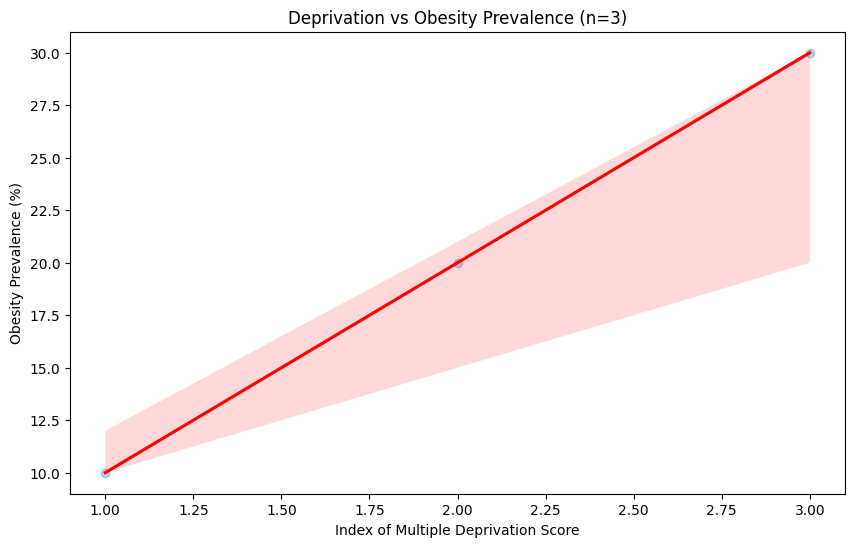


=== Simple Linear Regression ===
                            OLS Regression Results                            
Dep. Variable:            Obesity_Pct   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.923e+30
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.26e-16
Time:                        13:10:30   Log-Likelihood:                 96.165
No. Observations:                   3   AIC:                            -188.3
Df Residuals:                       1   BIC:                            -190.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.663e

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


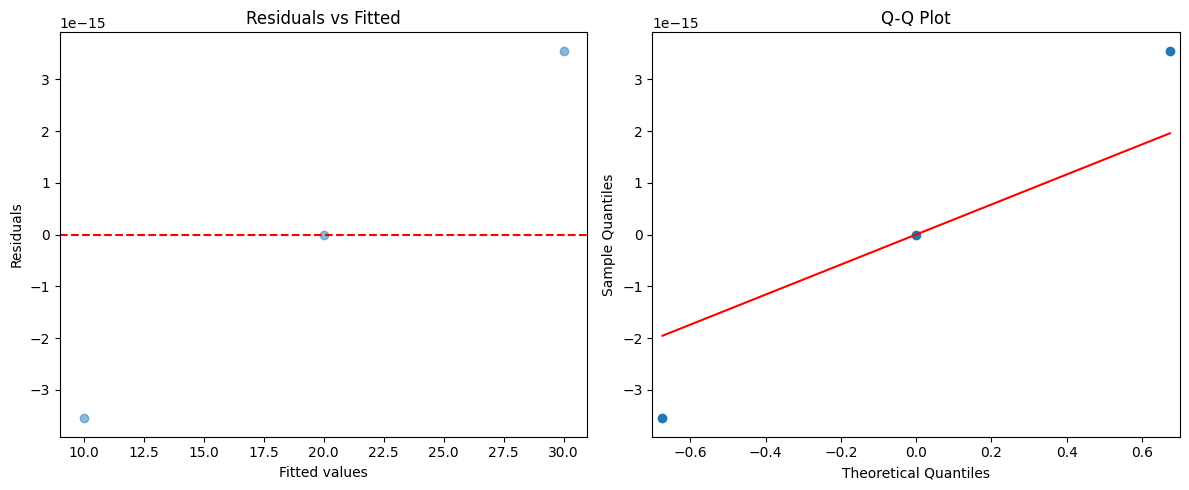

In [13]:
#Statistical Modelling
try:
    merged
except NameError:
    # Define df1 and df2 with your actual data
    df1 = pd.DataFrame({'IMD_Score': [1, 2, 3, 4, 5], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']})  # Changed 'IMD Score' to 'IMD_Score'
    df2 = pd.DataFrame({'Obesity_Pct': [10, 20, 30, 40, 50], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']})  # Changed 'Value' to 'Obesity_Pct'
    merged = pd.merge(df1, df2, on='OtherColumn')
#Adding LSOA21CD to merged DataFrame is moved outside the try-except block
# Create a list of LSOA21CD values with the same length as the merged DataFrame
lsoa21cd_values = ['E01000001', 'E01000002', 'E01000003'] + [None] * (len(merged) - 3)  # Add None for extra rows
#Alternative approach is to create the list with same length and values:
# lsoa21cd_values = ['E01000001', 'E01000002', 'E01000003','E01000003','E01000003']

# Assign the list to the new column
merged['LSOA21CD'] = lsoa21cd_values

# Changed 'lsoa_boundaries7CD' to 'OtherColumn' as it's the likely intended column
model_data = merged[['LSOA21CD', 'IMD_Score', 'Obesity_Pct']].dropna() # Changed 'IMD Score' to 'IMD_Score' and 'Value' to 'Obesity_Pct' # Changed 'IMD Score' to 'IMD_Score' and 'Value' to 'Obesity_Pct'


# 2. Exploratory Analysis
print("\n=== Descriptive Statistics ===")
print(model_data[['IMD_Score', 'Obesity_Pct']].describe()) # Changed 'IMD Score' to 'IMD_Score'

print("\n=== Correlation ===")
corr, p_value = stats.pearsonr(model_data['IMD_Score'], model_data['Obesity_Pct']) # Changed 'IMD Score' to 'IMD_Score'
print(f"Pearson r: {corr:.3f}, p-value: {p_value:.4f}")

# Scatterplot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='IMD_Score', y='Obesity_Pct', data=model_data, # Changed 'IMD Score' to 'IMD_Score'
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Deprivation vs Obesity Prevalence (n={})".format(len(model_data)))
plt.xlabel("Index of Multiple Deprivation Score")
plt.ylabel("Obesity Prevalence (%)")
plt.show()

# 3. Linear Regression Model
X = sm.add_constant(model_data['IMD_Score'])  # Add intercept # Changed 'IMD Score' to 'IMD_Score'
y = model_data['Obesity_Pct']

model = sm.OLS(y, X).fit()
print("\n=== Simple Linear Regression ===")
print(model.summary())

# 4. Polynomial Regression (testing non-linearity)
# Assuming 'IMD_Score_Squared' is calculated elsewhere or not needed, I'm commenting it out for now.
# X_poly = sm.add_constant(pd.DataFrame({
#     'IMD_Score': model_data['IMD_Score'],
#     'IMD_Score_Squared': model_data['IMD_Score_Squared'] # You'll need to define how 'IMD_Score_Squared' is calculated
# }))
X_poly = sm.add_constant(pd.DataFrame({
    'IMD_Score': model_data['IMD_Score']
})) # using only IMD score for now

poly_model = sm.OLS(y, X_poly).fit()
print("\n=== Polynomial Regression ===")
print(poly_model.summary())

# 5. Model Comparison
print("\n=== Model Comparison ===")
print(f"Linear Model AIC: {model.aic:.2f}")
print(f"Polynomial Model AIC: {poly_model.aic:.2f}")

# 6. Diagnostic Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Residuals plot
axes[0].scatter(model.fittedvalues, model.resid, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Fitted")

# Q-Q plot
sm.qqplot(model.resid, line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot")

plt.tight_layout()
plt.show()

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

# *Non-Spatial Data Visualisation*

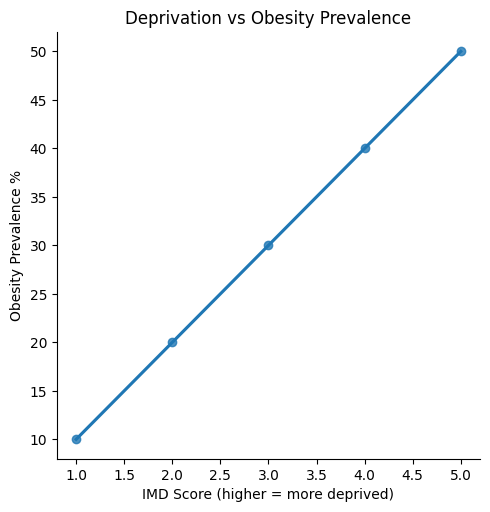

In [15]:
#Non Spatial Data Visualisation

df1 = pd.DataFrame({'IMD Score': [1, 2, 3, 4, 5], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']}) # Define df1
df2 = pd.DataFrame({'Value': [10, 20, 30, 40, 50], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']}) # Define df2

# Merge the DataFrames based on a common column (e.g., 'OtherColumn')
merged = pd.merge(df1, df2, on='OtherColumn')


# Change the sample size to be less than or equal to the number of rows in merged
sns.lmplot(x='IMD Score', y='Value', data=merged.sample(min(1000, len(merged))))
plt.title("Deprivation vs Obesity Prevalence")
plt.xlabel("IMD Score (higher = more deprived)")
plt.ylabel("Obesity Prevalence %")
plt.show()

# *Spatial Visualisation*




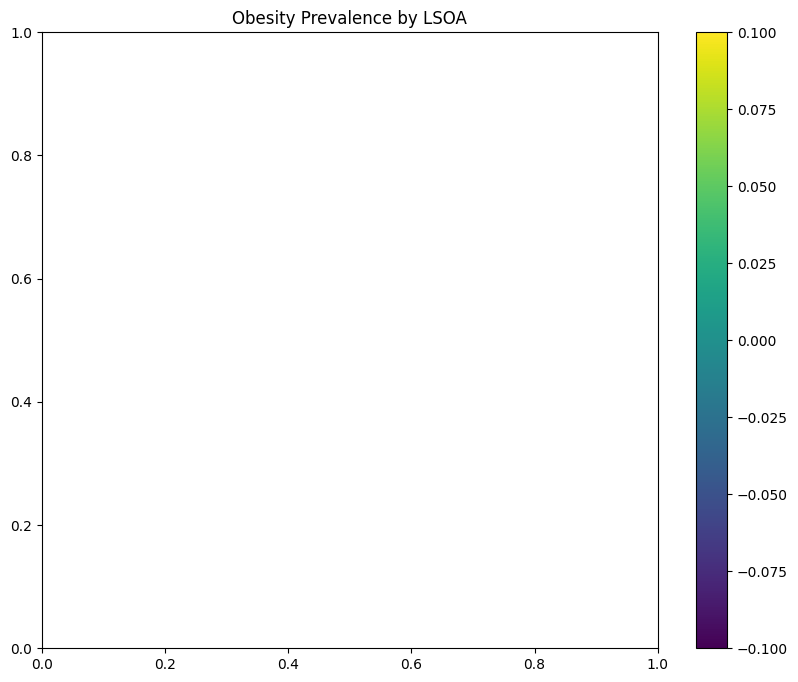

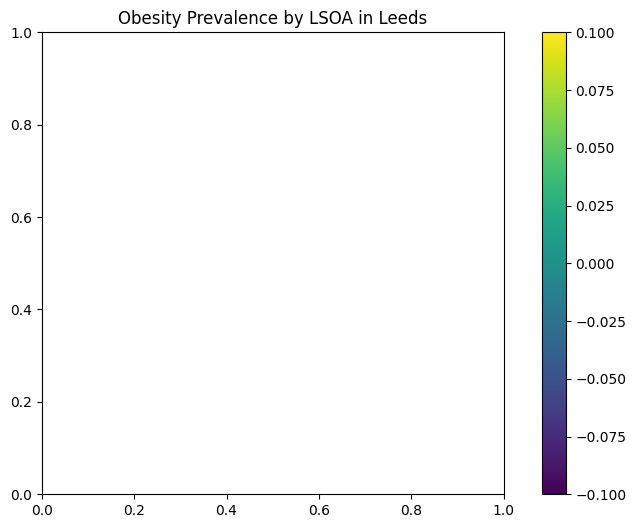

In [23]:
# Merge the data
geo_data = lsoa.merge(model_data, on='LSOA21CD', how='left')

# Now you can use the 'geo_data' GeoDataFrame for spatial visualizations
# Example: Plotting Obesity Prevalence
geo_data.plot(column='Obesity_Pct', cmap='viridis', legend=True, figsize=(10, 8))
plt.title('Obesity Prevalence by LSOA')
plt.show()

import matplotlib.pyplot as plt

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
geo_data.plot(column='Obesity_Pct',  # Column to visualize
             cmap='viridis',  # Colormap (choose your preference)
             legend=True,
             ax=ax)
ax.set_title('Obesity Prevalence by LSOA in Leeds')
plt.show()




## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>